En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None

# Para estandarizar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("data/adult.data_normalizado.csv", index_col = 0 )
df.head(2)

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_raiz
39,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,11261,Bajo,106.117859
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,3434,Bajo,58.600341


In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,final_weight,education_yrs,capital_gain,capital_lost,hours_week,salary,salary_raiz
39,,,,,,,
50,83311,13,0,0,13,11261,106.117859
38,215646,9,0,0,40,3434,58.600341
53,234721,7,0,0,40,22838,151.122467
28,338409,13,0,0,40,12556,112.053559
37,284582,14,0,0,40,40090,200.224874


In [4]:
#numericas.drop(["salary", "salary_log"], axis = 1, inplace = True)

KeyError: "['salary_log'] not found in axis"

# StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [7]:
# ajustamos nuestros datos.  

scaler.fit(numericas)

StandardScaler()

In [8]:
# transformamos los datos

numericas_escaladas = scaler.transform(numericas)

In [9]:
# Convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(numericas_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,final_weight,education_yrs,capital_gain,capital_lost,hours_week,salary,salary_raiz
0,-1.008742,1.134779,-0.145914,-0.216663,-2.22212,-0.671268,-0.823459
1,0.245046,-0.420027,-0.145914,-0.216663,-0.03543,-0.777093,-1.195730


In [10]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
final_weight,32560.0,-7.757922e-17,1.000015,-1.681667,-0.681682,-0.108186,0.447878,12.268555
education_yrs,32560.0,5.281061e-17,1.000015,-3.529637,-0.420027,-0.031325,0.746077,2.300883
capital_gain,32560.0,-1.964031e-17,1.000015,-0.145914,-0.145914,-0.145914,-0.145914,13.394381
capital_lost,32560.0,4.517271e-17,1.000015,-0.216663,-0.216663,-0.216663,-0.216663,10.593345
hours_week,32560.0,2.869667e-16,1.000015,-3.193982,-0.035430,-0.035430,0.369513,4.742893
salary,32560.0,-5.106480e-17,1.000015,-0.823455,-0.600610,-0.376284,-0.154567,3.231026
salary_raiz,32560.0,-5.542932e-17,1.000015,-1.637309,-0.648879,-0.229949,0.087809,2.635393


- Observamos en la columna std (desviacion estandar) que todos los valores están en torno al 1, es decir, estandarizados. 

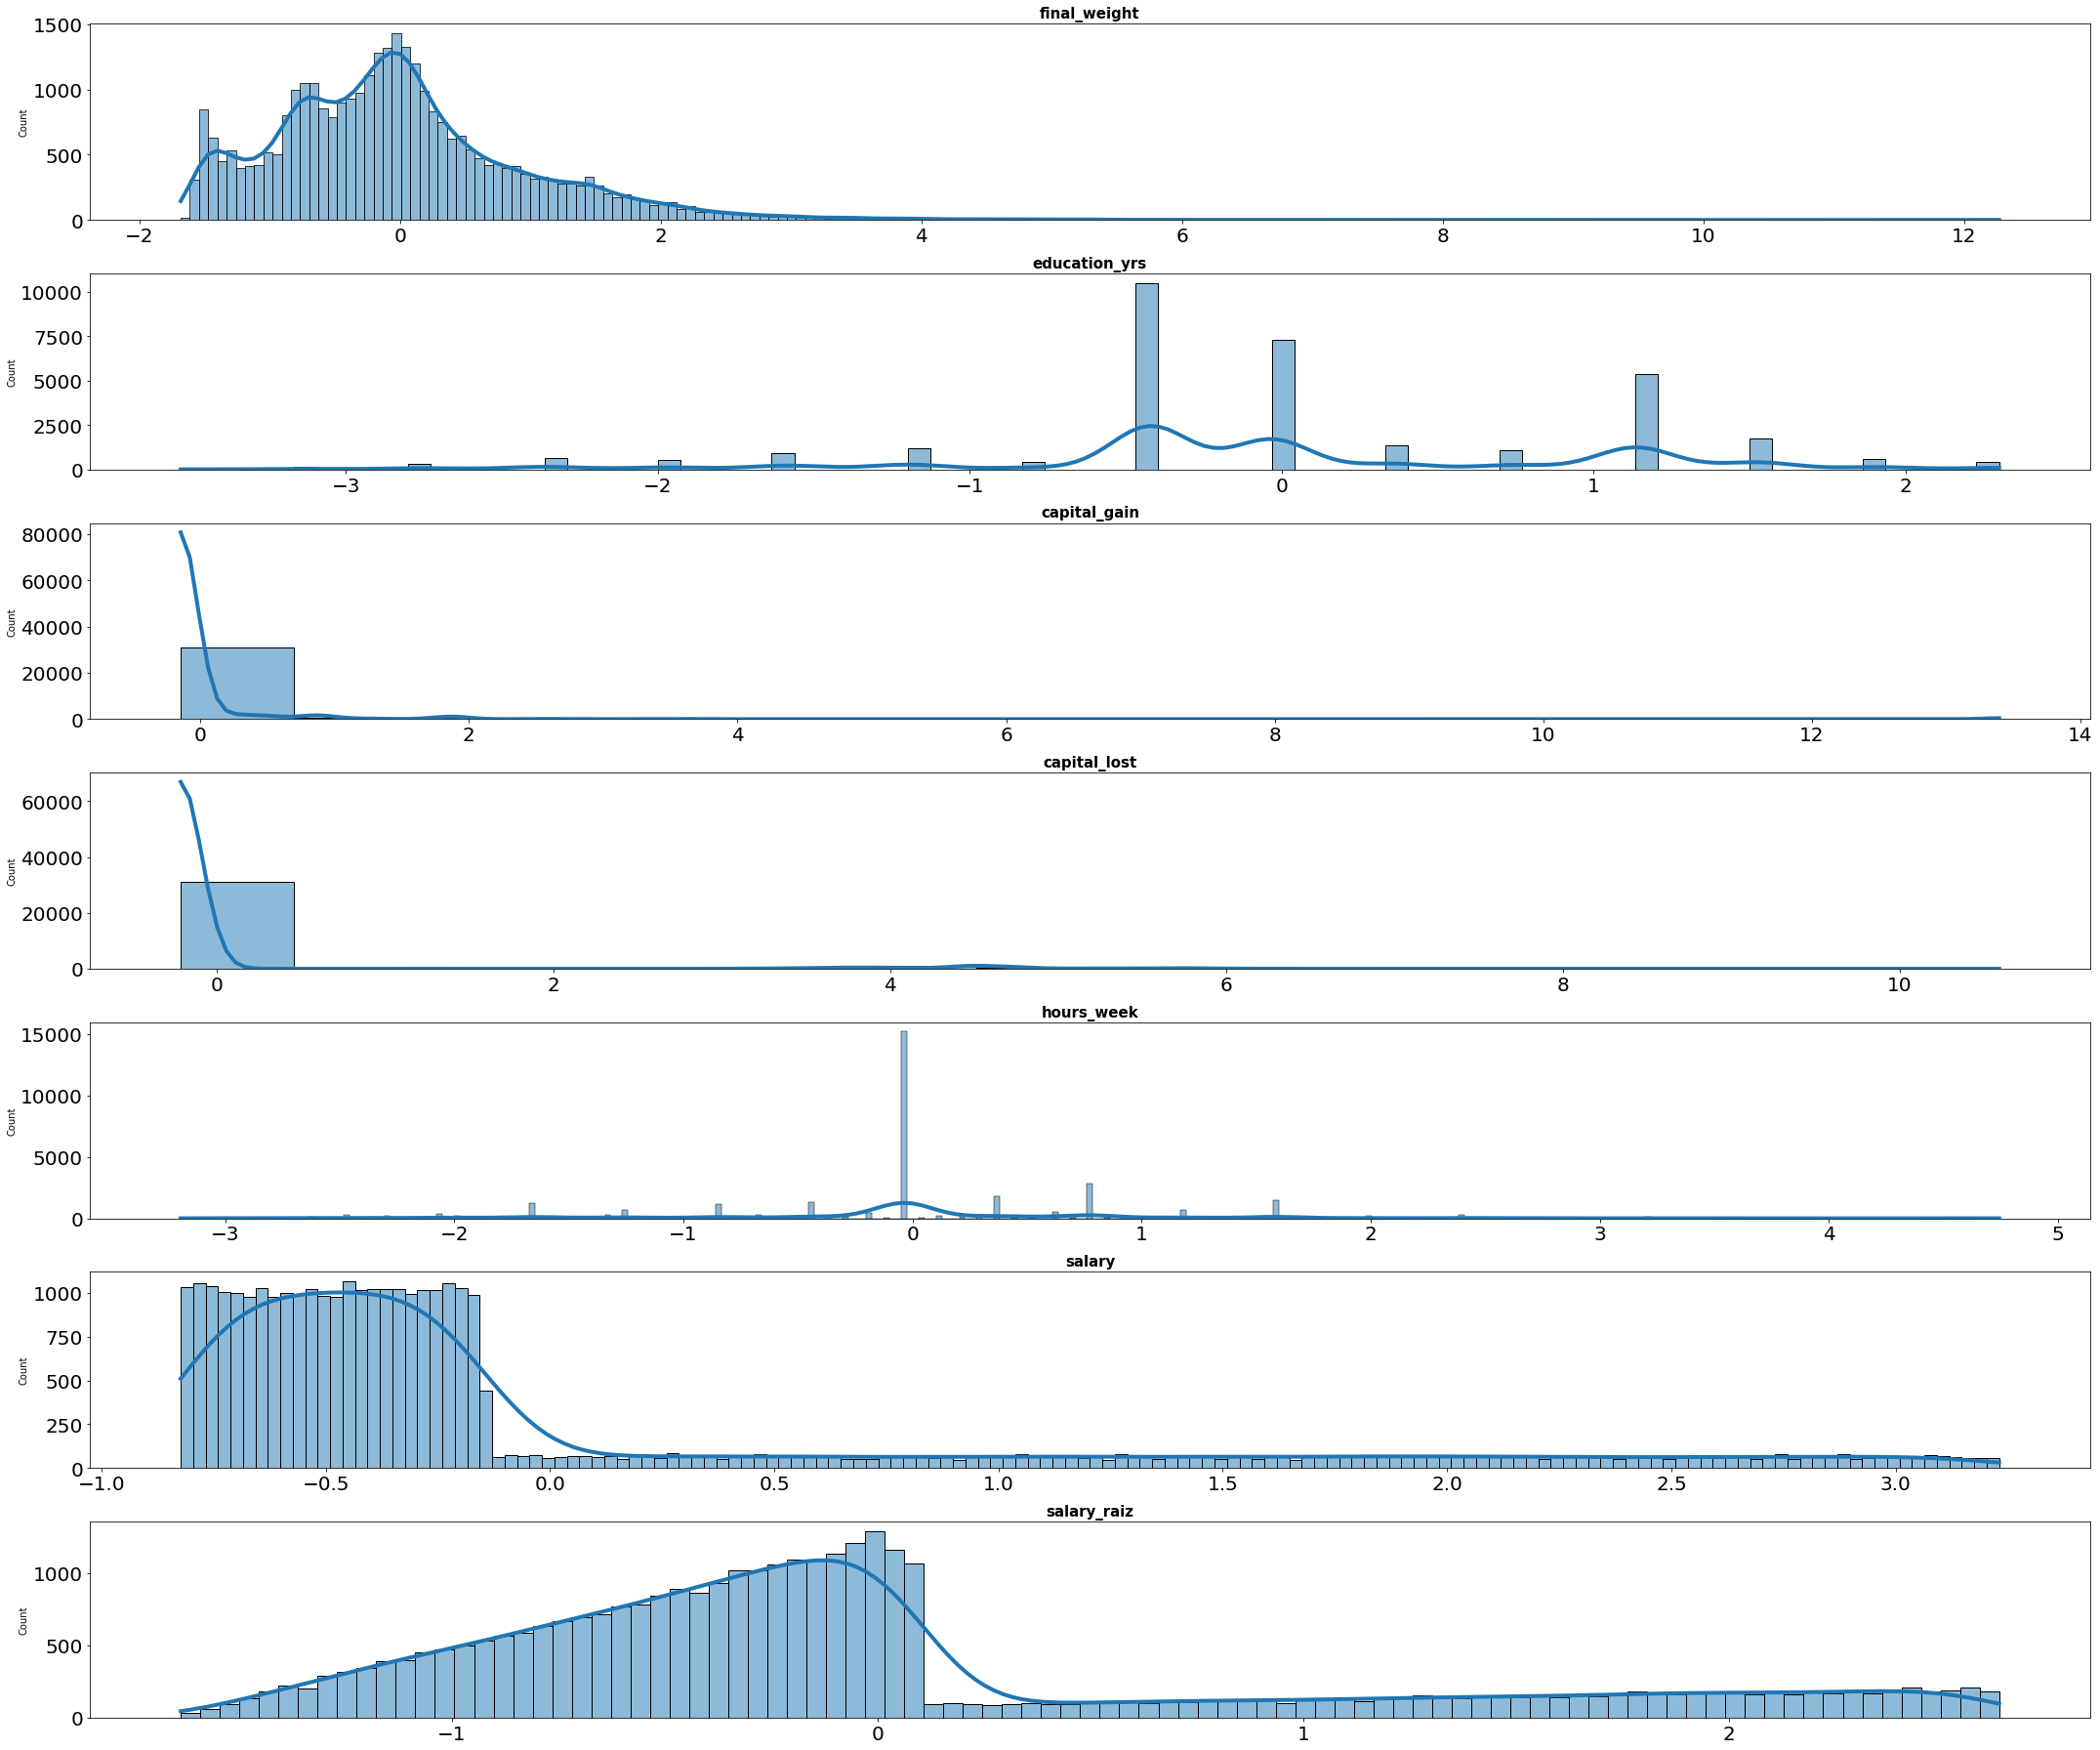

In [13]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (30, 25))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 4}, 
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

# RobustScaler

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
# construir el modelo de escalador
robust = RobustScaler()

In [16]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [17]:
# transformamos los datos
numericas_robust = robust.transform(numericas)

In [18]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(numericas_robust, columns = numericas.columns)
numericas_robust.head(2)

,final_weight,education_yrs,capital_gain,capital_lost,hours_week,salary,salary_raiz
0,-0.797262,1.000000,0.0,0.0,-5.4,-0.661337,-0.805648
1,0.312717,-0.333333,0.0,0.0,0.0,-0.898590,-1.310978


In [19]:
numericas_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
final_weight,32560.0,0.095777,0.885314,-1.393003,-0.507717,0.0,0.492283,10.957131
education_yrs,32560.0,0.026863,0.857570,-3.000000,-0.333333,0.0,0.666667,2.000000
capital_gain,32560.0,1077.615172,7385.402999,0.000000,0.000000,0.0,0.000000,99999.000000
capital_lost,32560.0,87.306511,402.966116,0.000000,0.000000,0.0,0.000000,4356.000000
hours_week,32560.0,0.087494,2.469524,-7.800000,0.000000,0.0,1.000000,11.800000
salary,32560.0,0.843606,2.241975,-1.002531,-0.502925,0.0,0.497075,8.087375
salary_raiz,32560.0,0.312138,1.357448,-1.910391,-0.568667,0.0,0.431333,3.889493


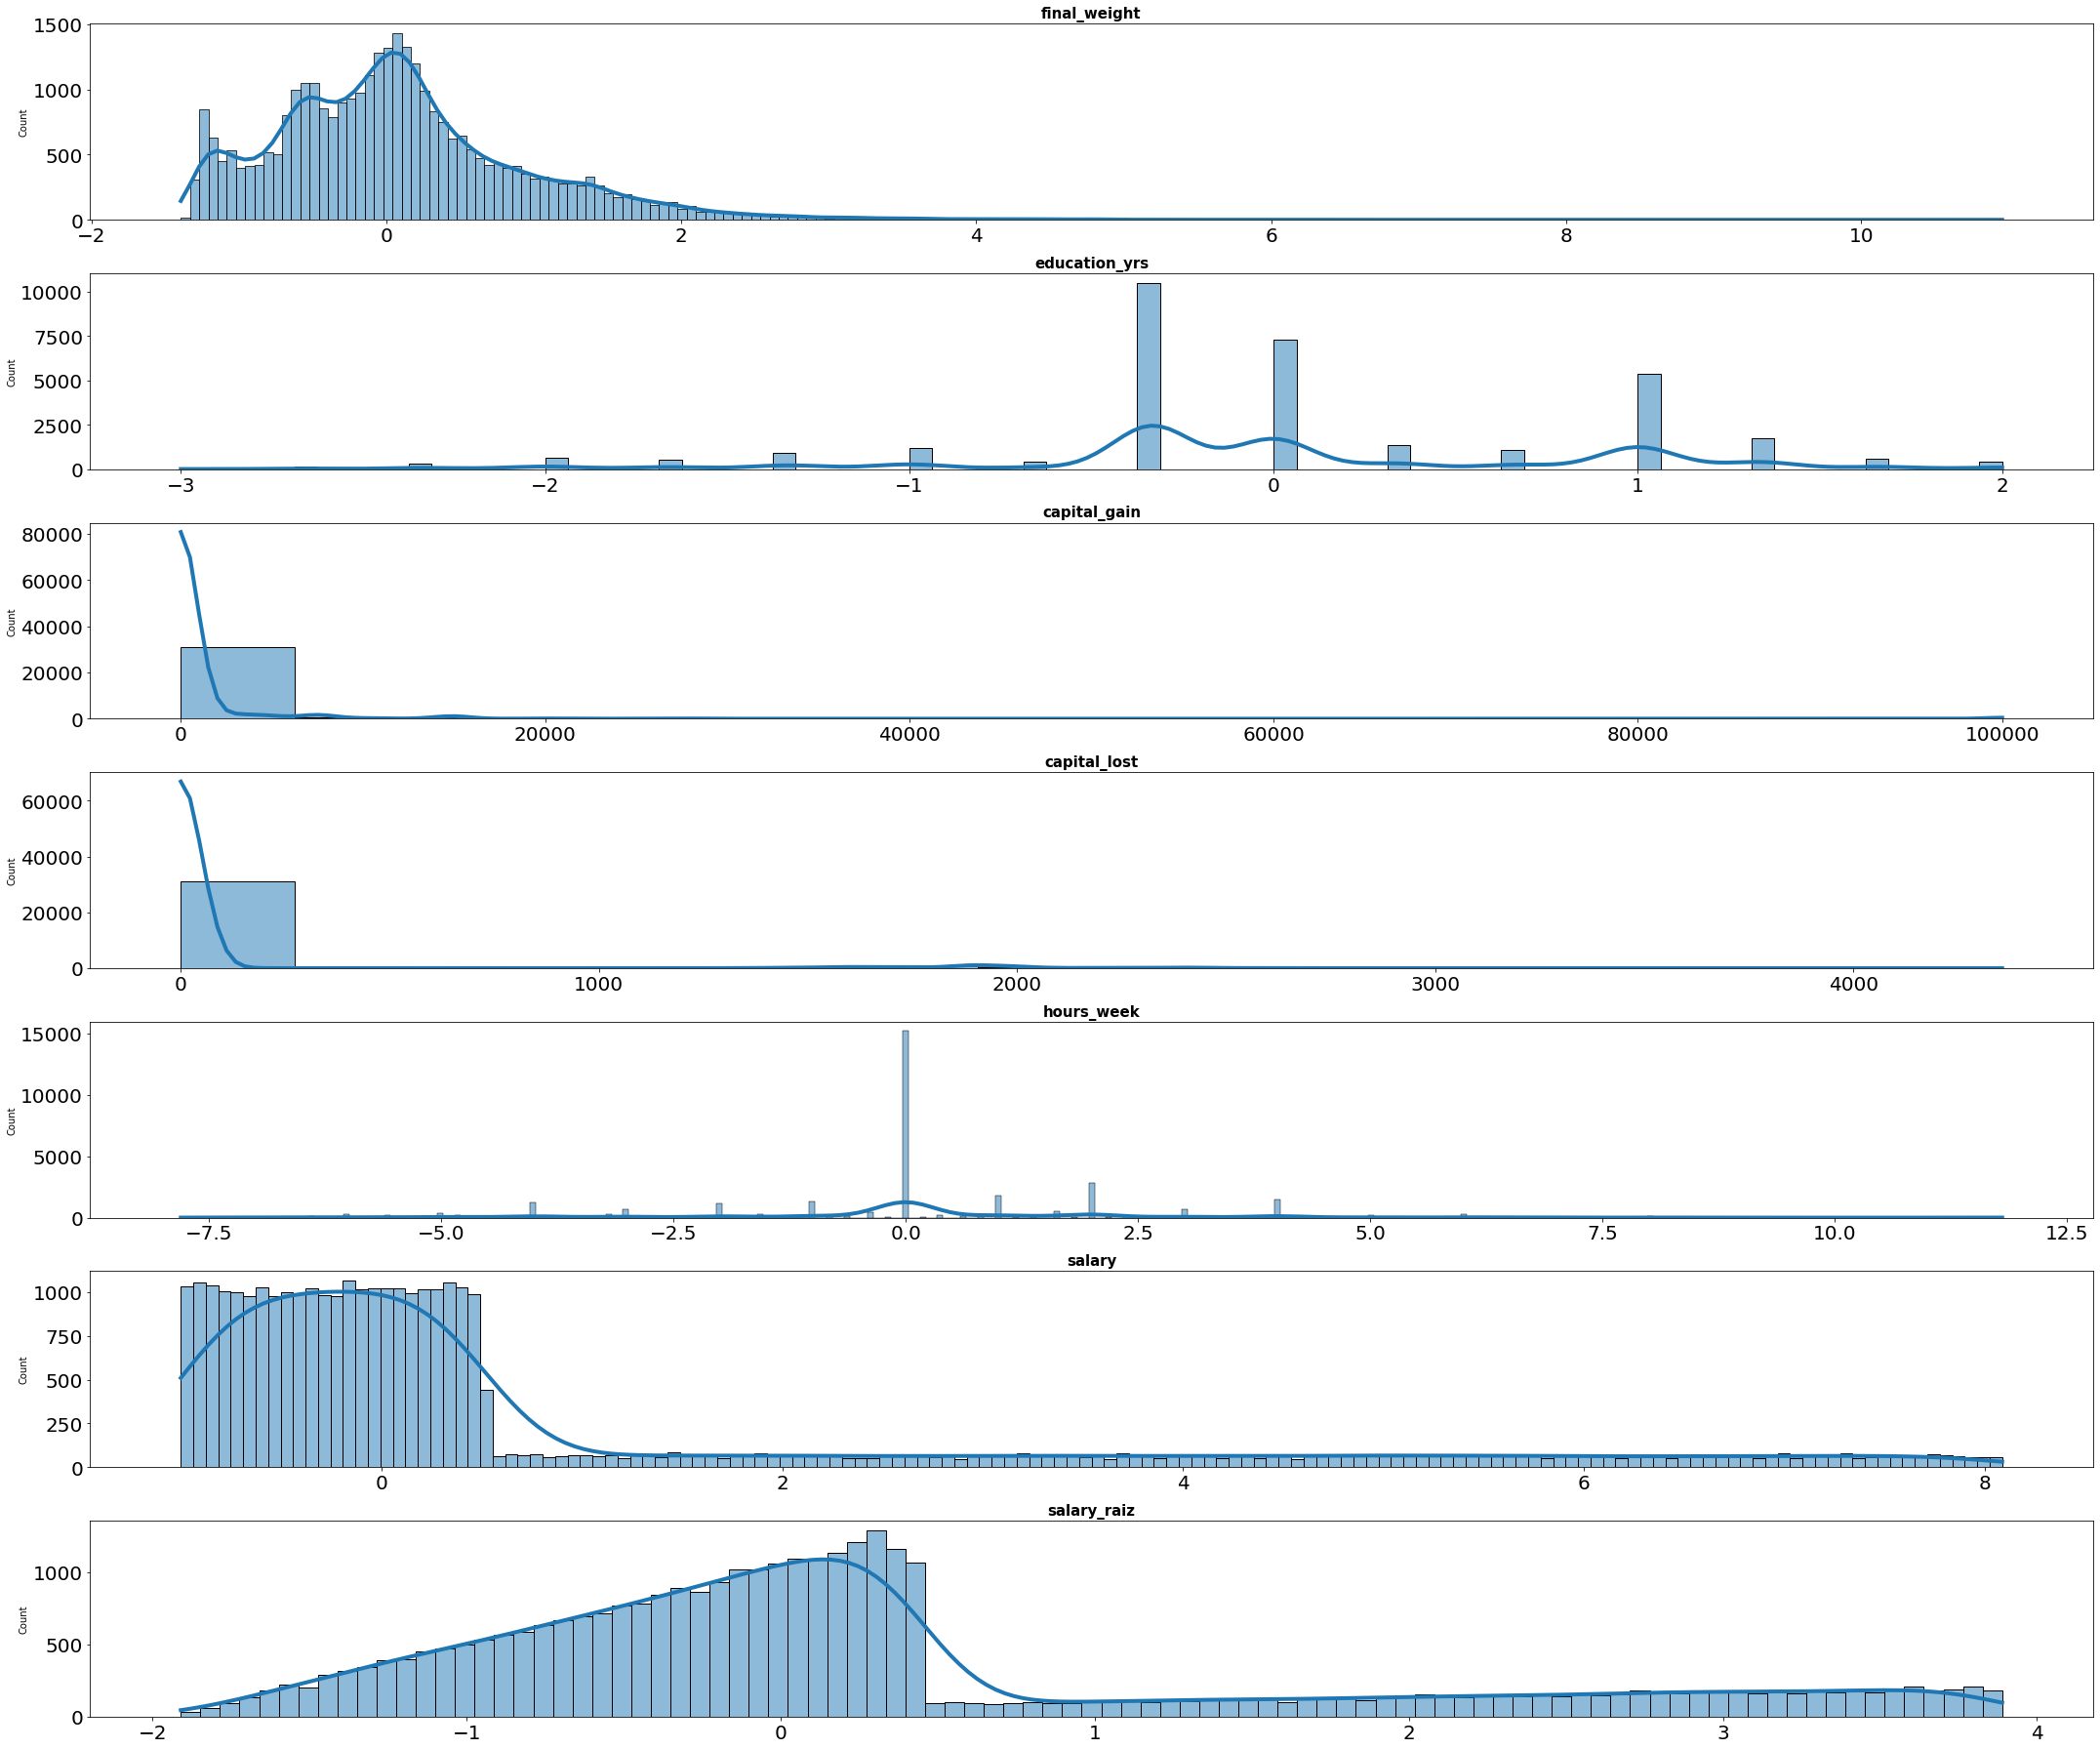

In [21]:
fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (30, 25))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 4}, 
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

- En nuestro caso, sabemos que tenemos muchos outliers por lo que intuimos que el mejor metodo para estandarizar sería el RobustScaler. 

In [22]:
# vamos a guardar este dataframe para seguir trabajando en la siguiente lección de Encoding con el. Pero antes de eso tenemos que juntar los resultados de la estandarización
## a nuestro dataframe original

df[numericas_robust.columns] = numericas_robust
df.head()



,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_raiz
39,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,0.407581,Bachelors,-0.333333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,-2.0,United-States,-0.790709,Bajo,-1.044859
38,Private,0.730681,HS-grad,0.666667,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.0,United-States,0.394892,Bajo,0.349327
53,Private,-0.574814,11th,-0.333333,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,4.0,United-States,0.322537,Bajo,0.289431
28,Private,0.125840,Bachelors,-0.333333,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.0,Cuba,0.512413,Bajo,0.443398
37,Private,-0.790191,Masters,0.000000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,-0.4,United-States,5.433359,Bajo,2.966126


In [23]:
df.to_csv("data/adult.numericas_robust.csv")